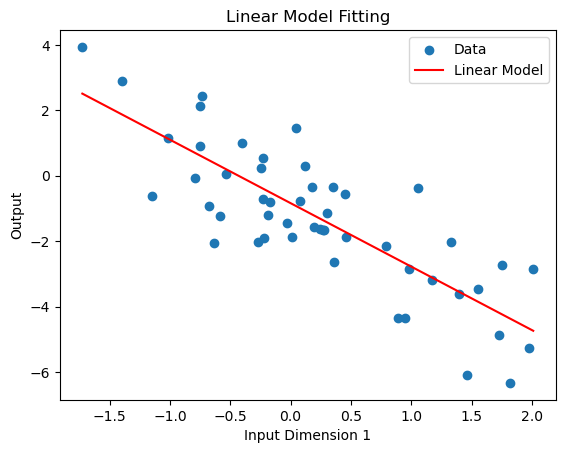

In [15]:
import numpy as np
import matplotlib.pyplot as plt

class LinearModel:
    def __init__(self, input_dim):
        self.input_dim = input_dim
        self.weights = np.random.randn(input_dim)  # Initialize weights randomly
        self.bias = np.random.randn()  # Initialize bias randomly

    def forward(self, x):
        return np.dot(x, self.weights) + self.bias

# Example usage:
input_dim = 2  # Dimensionality of input
model = LinearModel(input_dim)

# Generate some random input data
num_samples = 50
input_data = np.random.randn(num_samples, input_dim)

# Generate outputs using the model
output = model.forward(input_data)

# Plot the data and the linear model
plt.scatter(input_data[:, 0], output, label='Data')  # Plot against the first dimension of input_data
plt.xlabel('Input Dimension 1')
plt.ylabel('Output')

# Plot the linear model
x_values = np.linspace(min(input_data[:, 0]), max(input_data[:, 0]), 100)
y_values = model.weights[0] * x_values + model.bias  # Using the weight corresponding to the first dimension
plt.plot(x_values, y_values, color='red', label='Linear Model')

plt.legend()
plt.title('Linear Model Fitting')
plt.show()


Solution:
Weights: [ 2.23320663 -1.01383235  0.15352528  1.06761139 -1.54730045]
Bias: 0.30101281664339763


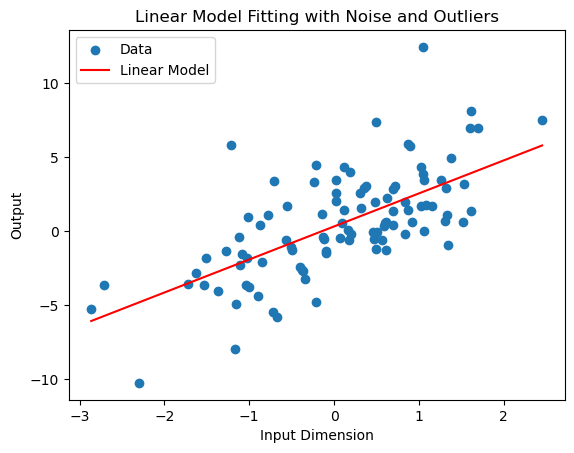

In [101]:
import numpy as np
import matplotlib.pyplot as plt

class LinearModel:
    def __init__(self, input_dim):
        self.input_dim = input_dim
        self.weights = np.random.randn(input_dim)  # Initialize weights randomly
        self.bias = np.random.randn()  # Initialize bias randomly

    def forward(self, x):
        return np.dot(x, self.weights) + self.bias

# Example usage:
input_dim = 5  # Dimensionality of input
model = LinearModel(input_dim)

# Generate some random input data
num_samples = 100
input_data = np.random.randn(num_samples, input_dim)

# Generate outputs using the model and add noise
noise_level = 0.5
output = model.forward(input_data) + np.random.normal(scale=noise_level, size=num_samples)

# Add blemishes (outliers) until a certain proportion of total samples is reached
blemish_proportion = 0.2  # Adjust this parameter to control the proportion of blemishes
num_blemishes = int(num_samples * blemish_proportion)
blemish_indices = np.random.choice(num_samples, num_blemishes, replace=False)
blemish_scale = 5.0  # Adjust this parameter to control the magnitude of blemishes
output[blemish_indices] += np.random.normal(scale=blemish_scale, size=(num_blemishes,))

# Print the solution
print("Solution:")
print("Weights:", model.weights)
print("Bias:", model.bias)

# Plot the data and the linear model
plt.scatter(input_data[:, 0], output, label='Data')  # Plot against the first dimension of input_data
plt.xlabel('Input Dimension')
plt.ylabel('Output')

# Plot the linear model
x_values = np.linspace(min(input_data[:, 0]), max(input_data[:, 0]), 100)
y_values = model.weights[0] * x_values + model.bias  # Using the weight corresponding to the first dimension
plt.plot(x_values, y_values, color='red', label='Linear Model')

plt.legend()
plt.title('Linear Model Fitting with Noise and Outliers')
plt.show()


<Figure size 1000x1200 with 0 Axes>

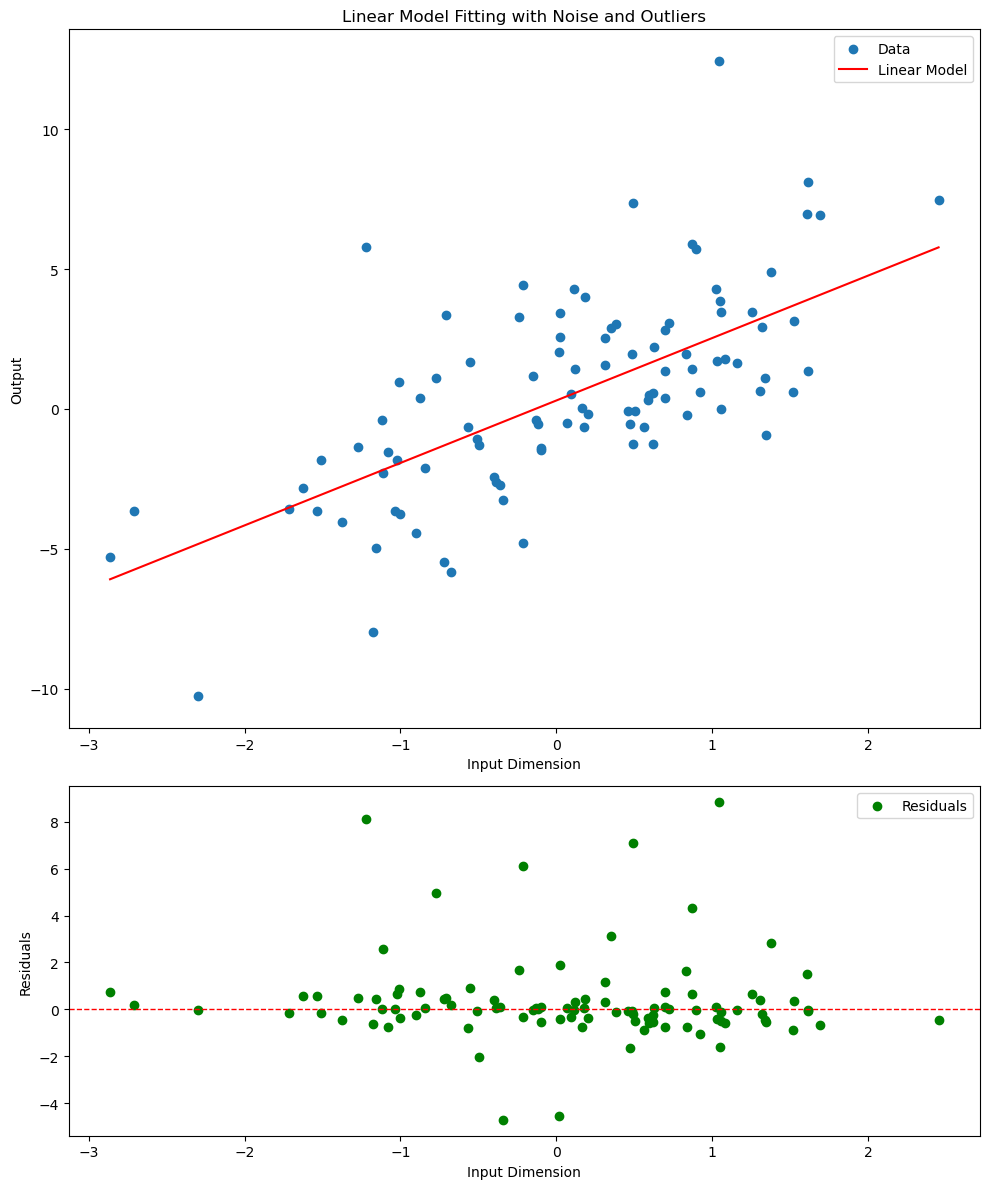

In [102]:
# Plot the data and the linear model
plt.figure(figsize=(10, 12))  # Adjust figure size

# Define height ratios for subplots
height_ratios = [2, 1]  # Original plot is twice as tall as the residual plot

# Create subplots with specified height ratios
fig, axs = plt.subplots(2, 1, figsize=(10, 12), gridspec_kw={'height_ratios': height_ratios})

# Plot original data and linear model
axs[0].scatter(input_data[:, 0], output, label='Data')  # Plot against the first dimension of input_data
axs[0].plot(x_values, y_values, color='red', label='Linear Model')
axs[0].set_xlabel('Input Dimension')
axs[0].set_ylabel('Output')
axs[0].legend()
axs[0].set_title('Linear Model Fitting with Noise and Outliers')

# Calculate residuals
predicted_output = model.forward(input_data)
residuals = output - predicted_output

# Plot residuals
axs[1].scatter(input_data[:, 0], residuals, color='green', label='Residuals')
axs[1].axhline(y=0, color='red', linestyle='--', linewidth=1)  # Add a horizontal line at y=0 for reference
axs[1].set_xlabel('Input Dimension')
axs[1].set_ylabel('Residuals')
axs[1].legend()

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


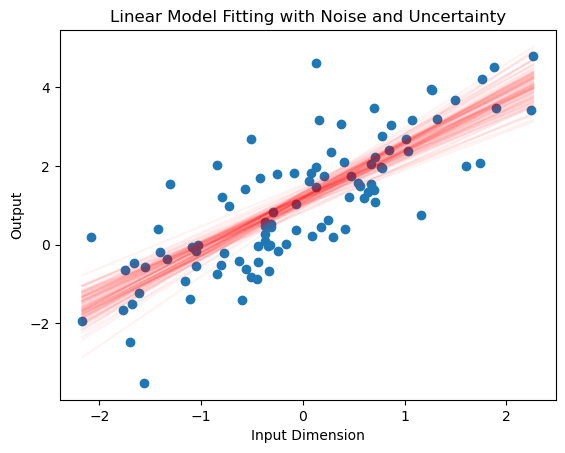

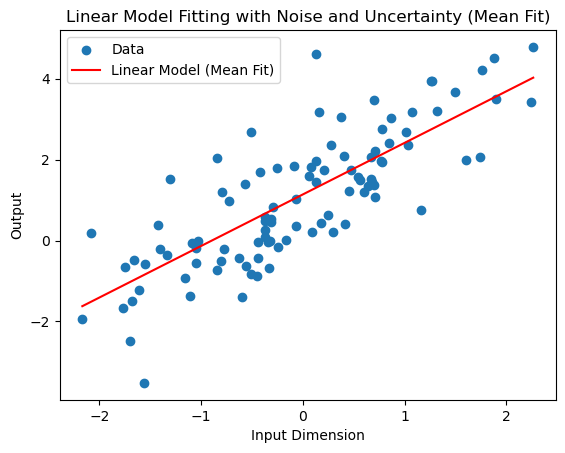

In [109]:
import numpy as np
import matplotlib.pyplot as plt

class LinearModel:
    def __init__(self, input_dim):
        self.input_dim = input_dim
        self.weights = np.random.randn(input_dim)  # Initialize weights randomly
        self.bias = np.random.randn()  # Initialize bias randomly

    def forward(self, x):
        return np.dot(x, self.weights) + self.bias

    def log_likelihood(self, x, y, noise_level):
        y_pred = self.forward(x)
        residual = y - y_pred
        return -0.5 * np.sum(residual ** 2 / noise_level**2)

    def log_prior(self):
        return -0.5 * np.sum(self.weights ** 2) - 0.5 * self.bias ** 2  # Assuming Gaussian priors

    def log_posterior(self, x, y, noise_level):
        return self.log_likelihood(x, y, noise_level) + self.log_prior()

# Example usage:
input_dim = 2  # Dimensionality of input
model = LinearModel(input_dim)

# Generate some random input data
num_samples = 100
input_data = np.random.randn(num_samples, input_dim)

# True coefficients and bias for generating the data
true_weights = np.array([2.0, -3.0])
true_bias = 1.5

# Generate outputs using the model and add noise
noise_level = 0.5
output = model.forward(input_data) + np.random.normal(scale=noise_level, size=num_samples)

# Metropolis-Hastings MCMC
num_samples_mcmc = 10000  # Number of MCMC samples
proposal_scale = 0.1  # Scale parameter for the Gaussian proposal distribution

# Initialize parameter values
current_weights = model.weights.copy()
current_bias = model.bias

# Lists to store the samples
weights_samples = []
bias_samples = []

# Perform MCMC sampling
for _ in range(num_samples_mcmc):
    # Propose new parameter values
    proposed_weights = current_weights + np.random.normal(scale=proposal_scale, size=input_dim)
    proposed_bias = current_bias + np.random.normal(scale=proposal_scale)

    # Compute the log posterior for current and proposed parameters
    log_posterior_current = model.log_posterior(input_data, output, noise_level)
    model.weights = proposed_weights
    model.bias = proposed_bias
    log_posterior_proposed = model.log_posterior(input_data, output, noise_level)

    # Accept or reject the proposal
    accept_prob = np.exp(log_posterior_proposed - log_posterior_current)
    if np.random.rand() < accept_prob:
        current_weights = proposed_weights
        current_bias = proposed_bias

    # Store the samples
    weights_samples.append(current_weights)
    bias_samples.append(current_bias)

# Convert lists to arrays
weights_samples = np.array(weights_samples)
bias_samples = np.array(bias_samples)

# Plot the data and the linear model fits
plt.scatter(input_data[:, 0], output, label='Data')  # Plot against the first dimension of input_data
plt.xlabel('Input Dimension')
plt.ylabel('Output')

# Plot the linear model fits sampled from MCMC
for i in range(100):
    idx = np.random.randint(len(weights_samples))  # Randomly select a set of parameters from the samples
    sampled_weights = weights_samples[idx]
    sampled_bias = bias_samples[idx]
    x_values = np.linspace(min(input_data[:, 0]), max(input_data[:, 0]), 100)
    y_values = sampled_weights[0] * x_values + sampled_bias  # Using the sampled parameters
    plt.plot(x_values, y_values, color='red', alpha=0.05)  # Plot with transparency for visualizing multiple fits

plt.title('Linear Model Fitting with Noise and Uncertainty')
plt.show()

# Calculate mean or median of the sampled weights and bias
mean_weights = np.mean(weights_samples, axis=0)
mean_bias = np.mean(bias_samples)

# Plot the data
plt.scatter(input_data[:, 0], output, label='Data')  # Plot against the first dimension of input_data
plt.xlabel('Input Dimension')
plt.ylabel('Output')

# Plot the mean or median linear model fit
x_values = np.linspace(min(input_data[:, 0]), max(input_data[:, 0]), 100)
y_values = mean_weights[0] * x_values + mean_bias  # Using the mean or median parameter values
plt.plot(x_values, y_values, color='red', label='Linear Model (Mean Fit)')

plt.title('Linear Model Fitting with Noise and Uncertainty (Mean Fit)')
plt.legend()
plt.show()


In [110]:
# Calculate mean or median of the sampled weights and bias
mean_weights = np.mean(weights_samples, axis=0)
mean_bias = np.mean(bias_samples)

# Alternatively, you can calculate the median instead of the mean
median_weights = np.median(weights_samples, axis=0)
median_bias = np.median(bias_samples)

print("Parameter Estimates (Mean):")
print("Weights:", mean_weights)
print("Bias:", mean_bias)

print("\nParameter Estimates (Median):")
print("Weights:", median_weights)
print("Bias:", median_bias)


Parameter Estimates (Mean):
Weights: [1.27443612 0.85133278]
Bias: 1.1406306563727082

Parameter Estimates (Median):
Weights: [1.27264001 0.84871084]
Bias: 1.1349606183005572
